***Task 1 :***

In [6]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [19]:
# load the iris data
iris= sklearn.datasets.load_iris()
# convert the data to pandas dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['class'] = iris.target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


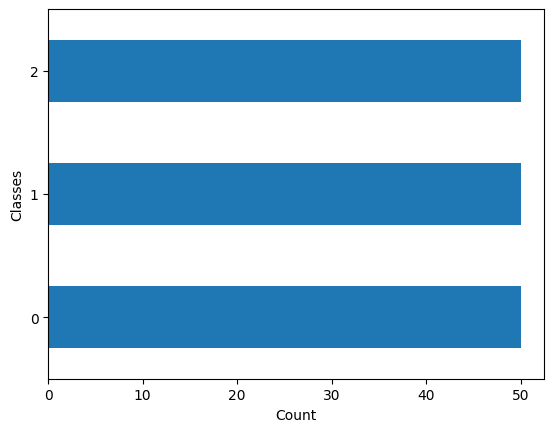

In [20]:
# plotting a graph to see class counts
data['class'].value_counts().plot(kind = "barh") 
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

In [21]:
X = data.drop("class", axis = 1)
Y = data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

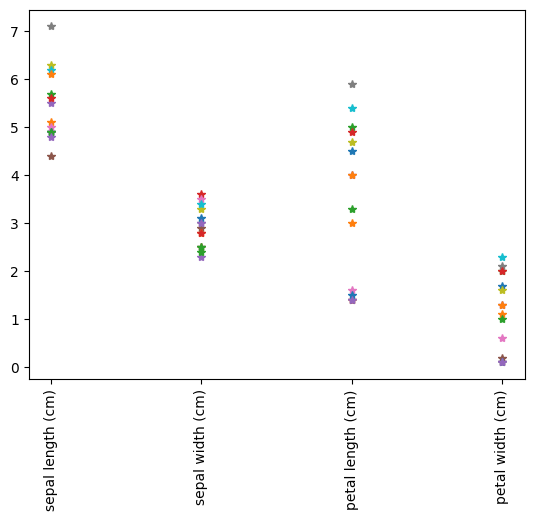

In [22]:
plt.plot(X_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.metrics import accuracy_score

class Perceptron:
    
    def __init__(self):
        self.b = None
        self.w = None
    
    def model(self, x):
        return 1 if np.dot(self.w, x) >= self.b else 0
    
    def predict(self, X):
        y_pred = []
        for x in X:
            result = self.model(x)
            y_pred.append(result)
        return np.array(y_pred)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        self.b = 0
        self.w = np.zeros(X.shape[1])
        accuracy = {}
        max_accuracy = 0
        
        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w += lr * x
                    self.b += lr * 1
                elif y == 0 and y_pred == 1:
                    self.w -= lr * x
                    self.b -= lr * 1
            
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                checkpoint_w = self.w
                checkpoint_b = self.b
        
        self.w = checkpoint_w
        self.b = checkpoint_b
        
        print("Max Accuracy: ", max_accuracy)
        plt.plot(list(accuracy.values()))
        plt.ylim([0, 1])
        plt.show()


Max Accuracy:  0.6666666666666666


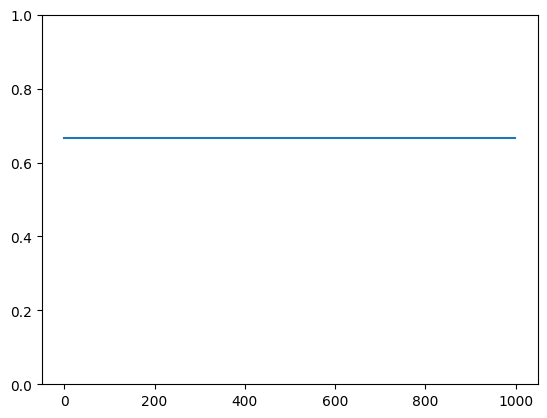

In [25]:
perceptron1 = Perceptron()
perceptron1.fit(X_train_scaled, Y_train, epochs=1000, lr=0.01)

In [26]:
Y_pred_test = perceptron1.predict(X_test_scaled)
print(accuracy_score(Y_pred_test, Y_test))

0.6666666666666666


In [27]:
w = perceptron1.w
b = perceptron1.b
print("Weights:", w)
print("Bias:", b)

Weights: [ 0.0095806  -0.00749932  0.01290436  0.0132119 ]
Bias: -0.01


***Task2 :***

In [31]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the Banknote Authentication dataset
banknote = fetch_openml(name='banknote-authentication')

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(banknote.data, banknote.target, test_size=0.3, random_state=42)

# create a Perceptron object
clf = Perceptron(random_state=42)

# train the model on the train set
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)
if acc >0.65 :
  print("The prediction is strong")
else:
  print("The prediction is weak")


Accuracy: 0.9781553398058253
The prediction is strong


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
